In [1]:
%matplotlib notebook
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt

## Fuel
Define fuel loaded at start of flight.  1.4 gallons is typically assumed for consumption during taxi and run-up.  

In [2]:
fuel_start = (40 - 1.4) * u.gal
density_100LL = 6 * u.imperial.lb / u.gal
weight_fuel_start = fuel_start * density_100LL

## Manifest
Passengers row 1 and 2, left and right seats.  Baggage areas 1 and 2.

In [3]:
weight_1_L = 155 * u.imperial.lb
weight_1_R = 155 * u.imperial.lb
weight_2_L = 0 * u.imperial.lb
weight_2_R = 0 * u.imperial.lb
weight_bag_1 = 50 * u.imperial.lb
weight_bag_2 = 0 * u.imperial.lb

## Aircraft Empty Weight
This is a generic number for a Cessna 172N.  Numbers for the actual aircraft being flow shoud be used.

In [4]:
weight_empty = 1454 * u.imperial.lb
arm_empty = 39.6 * u.imperial.inch

## Moment Arms
Average values from a Cessna 172N POH.

In [5]:
arm_fuel = 47.9 * u.imperial.inch
arm_1 = 37 * u.imperial.inch
arm_2 = 73 * u.imperial.inch
arm_bag_1 = 95 * u.imperial.inch
arm_bag_2 = 123 * u.imperial.inch

## Weight and Balance for Start of Flight

In [6]:
weight_start = (weight_empty + weight_fuel_start +
                weight_1_L + weight_1_R +
                weight_2_L + weight_2_R +
                weight_bag_1 + weight_bag_2)
weight_start

<Quantity 2045.6 lb>

In [7]:
mom_start = (weight_empty * arm_empty +
             (weight_fuel_start) * arm_fuel +
             (weight_1_L + weight_1_R) * arm_1 +
             (weight_2_L + weight_2_R) * arm_2 +
             (weight_bag_1) * arm_bag_1 +
             (weight_bag_2) * arm_bag_2)
cg_start = mom_start / weight_start
cg_start

<Quantity 41.49982401251467 inch>

## Operating Envelopes
Digitized data from a Cessna 172N POH

In [8]:
CG_Normal = np.array([[35,1500],
                    [35, 1950],
                    [38.5,2300],
                    [47.25,2300],
                    [47.25,1500]])
CG_Utility = np.array([[35,1500],
                      [35,1950],
                      [35.5,2000],
                     [40.5,2000],
                     [40.5,1500]])

<IPython.core.display.Javascript object>


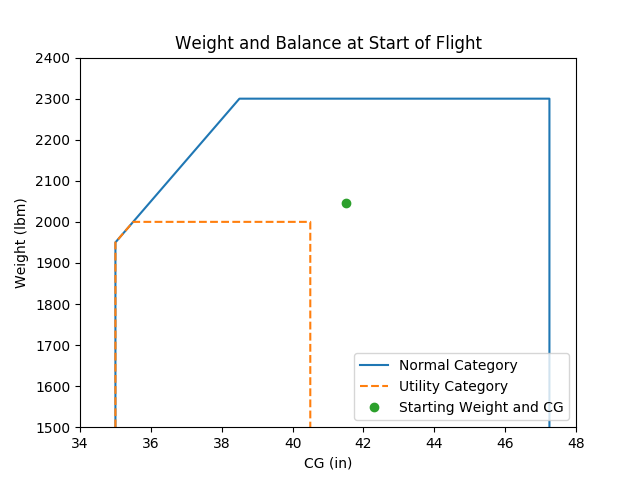

In [9]:
Env_Normal = plt.plot(CG_Normal[:,0], CG_Normal[:,1], '-C0', label="Normal Category")
Env_Utility = plt.plot(CG_Utility[:,0], CG_Utility[:,1], '--C1', label="Utility Category")
WB_Start = plt.plot(cg_start, weight_start, 'oC2', label="Starting Weight and CG")

plt.xlabel("CG (in)")
plt.ylabel("Weight (lbm)")
plt.title("Weight and Balance at Start of Flight")
plt.axis([34,48,1500,2400])
plt.legend(loc='best')

## Interpolation tests for performance calculations
Use 2500 rpm values to start

In [15]:
# Array of altitude in feet and fuel flow in gallons / hr
fuel_flow_2500 = np.array([[2000, 8.4],
                           [4000, 8.0],
                           [6000, 7.6],
                           [8000, 7.2],
                           [10000, 6.8],
                           [12000, 6.5]])

In [16]:
fuel_flow_2500

array([[  2.00000000e+03,   8.40000000e+00],
       [  4.00000000e+03,   8.00000000e+00],
       [  6.00000000e+03,   7.60000000e+00],
       [  8.00000000e+03,   7.20000000e+00],
       [  1.00000000e+04,   6.80000000e+00],
       [  1.20000000e+04,   6.50000000e+00]])

In [21]:
np.interp(3500, fuel_flow_2500[:,0], fuel_flow_2500[:,1])

8.1